In [ ]:
!pip install mplsoccer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for mplsoccer: filename=mplsoccer-1.1.3-py3-none-any.whl size=68833 sha256=f15a55c557cc6f87089e1e53e1f3545326b6cb6f170f09fcc1a7d41ca4399d0d
  Stored in directory: /root/.cache/pip/wheels/1d/db/cd/c447db2c51008636754add273f8ceac0751aab6a9f13166ec4
Successfully built mplsoccer


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
from matplotlib.patches import Arc
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/'My Drive'/zot.csv .

In [ ]:
df = pd.read_csv('zot.csv')
df.head()

,id,playerId,teamId,matchId,matchPeriod,eventSec,eventId,eventName,subEventId,subEventName,x,y,x1,y1,tags/0/id,tags/1/id,tags/2/id,tags/3/id,tags/4/id
0,1340284148,101668,13895,5363103,1H,118.3,8,Pass,85,Simple pass,26,56,6,54,1801.0,NaN,NaN,NaN,NaN
1,1340284152,101668,13895,5363103,1H,124.0,8,Pass,85,Simple pass,29,73,19,66,1801.0,NaN,NaN,NaN,NaN
2,1340284186,101668,13895,5363103,1H,182.9,8,Pass,85,Simple pass,88,74,77,52,302.0,1801.0,NaN,NaN,NaN
3,1340284232,101668,13895,5363103,1H,302.5,1,Duel,12,Ground defending duel,68,92,62,92,1601.0,701.0,1802.0,NaN,NaN
4,1340284234,101668,13895,5363103,1H,304.5,2,Foul,20,Foul,62,92,68,92,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    141 non-null    object
 1   Player  141 non-null    object
 2   Event   141 non-null    object
 3   Mins    141 non-null    int64 
 4   Secs    141 non-null    int64 
 5   X       141 non-null    int64 
 6   Y       141 non-null    int64 
 7   X2      141 non-null    object
 8   Y2      141 non-null    object
dtypes: int64(4), object(5)
memory usage: 10.0+ KB


In [ ]:
df1=df[['Player', 'Event']]
df1.head()

,Player,Event
0,Николаев Кирилл,Tackle Un
1,Сабирзянов Адель,Interception Suc
2,Зиннатов Даниль,Tackle Suc
3,Николаев Кирилл,Fouls Lose
4,Воронов Данил,Aerial Suc


In [ ]:
df1 = df[df['opTeam'] == 'Yenisey']
df1.head()

,type,minute,second,teams,x1,y1,x2,y2,opTeam,players,accurate,recipient,withShot,withShotOnGoal,withGoal
12,"corner, secondary []",20,2,Orenburg,100,100,86,90,Yenisey,"A. Mironov, position: RCMF3",TRUE,K. Pechenin position: LB,FALSE,FALSE,FALSE
15,"corner, secondary []",63,31,Orenburg,100,100,100,38,Yenisey,"K. Pechenin, position: LB",FALSE,None position: None,None,None,None
20,"corner, secondary []",57,54,Orenburg,100,0,79,65,Yenisey,"A. Mironov, position: RCMF3",TRUE,T. Ayupov position: LCMF3,TRUE,FALSE,FALSE
21,"corner, secondary []",93,2,Orenburg,100,0,94,3,Yenisey,"A. Mironov, position: LCMF3",TRUE,M. Sivakov position: DMF,FALSE,FALSE,FALSE
115,"corner, secondary []",8,14,Tom Tomsk,100,0,80,17,Yenisey,"A. Gordyushenko, position: LW",TRUE,I. Kubyshkin position: LCMF,FALSE,FALSE,FALSE


In [ ]:
df2 = df1[df1['y1'] == 0]
df2.head()

,type,minute,second,teams,x1,y1,x2,y2,opTeam,players,accurate,recipient,withShot,withShotOnGoal,withGoal
20,"corner, secondary []",57,54,Orenburg,100,0,79,65,Yenisey,"A. Mironov, position: RCMF3",TRUE,T. Ayupov position: LCMF3,TRUE,FALSE,FALSE
21,"corner, secondary []",93,2,Orenburg,100,0,94,3,Yenisey,"A. Mironov, position: LCMF3",TRUE,M. Sivakov position: DMF,FALSE,FALSE,FALSE
115,"corner, secondary []",8,14,Tom Tomsk,100,0,80,17,Yenisey,"A. Gordyushenko, position: LW",TRUE,I. Kubyshkin position: LCMF,FALSE,FALSE,FALSE
116,"corner, secondary []",33,7,Tom Tomsk,100,0,94,48,Yenisey,"A. Gordyushenko, position: LW",FALSE,M. Oparin position: GK,FALSE,FALSE,FALSE
118,"corner, secondary []",81,47,Tom Tomsk,100,0,93,57,Yenisey,"A. Gordyushenko, position: LW",TRUE,Dénis Duarte position: RCB,FALSE,FALSE,FALSE


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


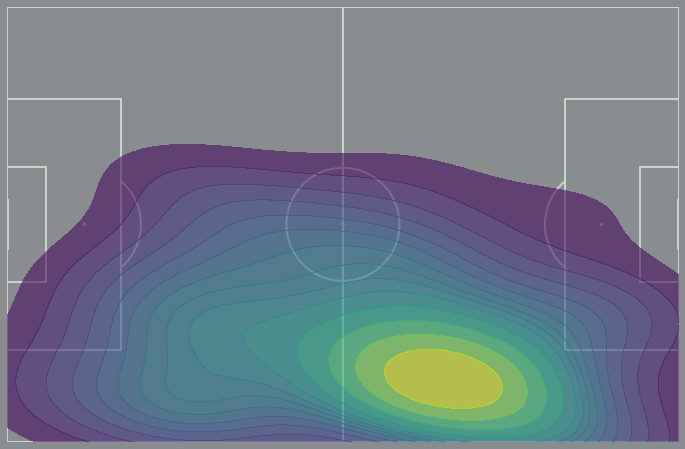

In [ ]:
fig, ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#8A8D8F')
ax.patch.set_facecolor('#8A8D8F')

pitch = Pitch(pitch_type='opta', pitch_color='#8A8D8F', line_color='#c7d5cc')

pitch.draw(ax=ax)
plt.gca().invert_xaxis()

kde = sns.kdeplot(
    df['x'],
    df['y'],
    shade = True,
    shade_lowest = False,
    gridsize = 100, 
    alpha = .6,
    n_levels = 15,
    thresh = 0.07, 
    cmap = 'viridis'
)




#for x in range(len(df['X'])):
  #if df['Event'][x] == 'Tackle won' :
    #plt.plot((df['X'][x]),(df['Y'][x]),"o", color='white')
  #if df['Event'][x] == 'Tackle Def' :
  #  plt.plot((df['X'][x]),(df['Y'][x]),"o", color='red')
  #if df['Event'][x] == 'Aerial Won' :
  #  plt.plot((df['X'][x]),(df['Y'][x]),"o", color='white')
  #if df['Event'][x] == 'Aerial Def' :
  #  plt.plot((df['X'][x]),(df['Y'][x]),"o", color='red')

    
    
    #plt.plot((df['X'][x]),(df['Y'][x]),"o", color='white')
  
  
  




  

plt.xlim(0,100)
plt.ylim(100,0)

plt.title('',color='white',size=20)
plt.show()

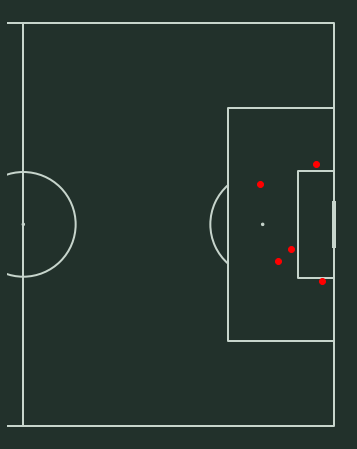

In [ ]:
fig, ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='opta', half=True, orientation=None,
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)


pitch.draw(ax=ax)
plt.gca().invert_yaxis()

for x in range(len(df['X'])):
  if (df['Event'][x] == 'Goal moment') :
    plt.plot((df['X'][x]),(df['Y'][x]),"o", color='red')


  #plt.plot(int(df7["X2"][x]),int(df7["Y2"][x]),">", color="white")
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='opta', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)


pitch.draw(ax=ax)
plt.gca().invert_yaxis()

kde = sns.kdeplot(
    data['X'],
    data['Y'],
    shade = True,
    shade_lowest = False,
    alpha = .4,
    n_levels = 8,
    cmap = 'magma'
)

for x in range(len(df['X'])):
  if df['Player'][x] == 'Горелов Игорь' :
    plt.plot((df['X'][x]),(df['Y'][x]),"o",  color='red')





plt.xlim(0,100)
plt.ylim(0,100)

plt.title('Оборонительные действия Игоря Горелова',color='white',size=20)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='opta', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)


pitch.draw(ax=ax)


kde = sns.kdeplot(
    data1['X'],
    data1['Y'],
    shade = True,
    shade_lowest = False,
    alpha = .4,
    n_levels = 8,
    cmap = 'magma'
)

for x in range(len(df['X'])):
  if df['Player'][x] == 'Никитин Кирилл' :
    plt.plot((df['X'][x]),(df['Y'][x]),"o",  color='red')





plt.xlim(0,100)
plt.ylim(0,100)

plt.title('Оборонительные действия Кирилла Никитина',color='white',size=20)
plt.show()

In [ ]:
data2 = df[df['Player'] == 'Галлямов Эмиль']
data2.head()

In [ ]:
fig, ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='opta', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True)


pitch.draw(ax=ax)
plt.gca().invert_yaxis()

kde = sns.kdeplot(
    data2['X'],
    data2['Y'],
    shade = True,
    shade_lowest = False,
    alpha = .4,
    n_levels = 8,
    cmap = 'magma'
)

for x in range(len(df['X'])):
  if df['Player'][x] == 'Галлямов Эмиль' :
    plt.plot((df['X'][x]),(df['Y'][x]),"o",  color='red')





plt.xlim(0,100)
plt.ylim(0,100)

plt.title('Оборонительные действия Эмиля Галлямова',color='white',size=20)
plt.show()